<a href="https://colab.research.google.com/github/anushka1947/Apple_stock_Prediction/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from google.colab import files
files.upload()


Saving AAPL.csv to AAPL (3).csv


{'AAPL (3).csv': b',symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor\r\n0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.6825575315,121.88068506280001,119.8441183458,120.11136013219999,45833246,0.0,1.0\r\n1,AAPL,2015-05-28 00:00:00+00:00,131.78,131.95,131.1,131.86,30733309,121.4383538301,121.5950128084,120.8117179172,121.5120757022,30733309,0.0,1.0\r\n2,AAPL,2015-05-29 00:00:00+00:00,130.28,131.45,129.9,131.23,50884452,120.0560687281,121.13425110770001,119.70588983559999,120.9315159594,50884452,0.0,1.0\r\n3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.39,130.05,131.2,32112797,120.29105719549999,121.0789597036,119.8441183458,120.9038702574,32112797,0.0,1.0\r\n4,AAPL,2015-06-02 00:00:00+00:00,129.96,130.655,129.32,129.86,33667627,119.7611812397,120.40164000360001,119.1714062628,119.6690288995,33667627,0.0,1.0\r\n5,AAPL,2015-06-03 00:00:00+00:00,130.12,130.94,129.9,130.66,30983542,119.9086249839,120.664274173,119.

In [ ]:
df = pd.read_csv('AAPL.csv')


In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:

df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df1=df.reset_index()['close']

In [ ]:

df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


In [ ]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - loss: 0.0286 - val_loss: 0.0750
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0011 - val_loss: 0.0084
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - loss: 9.9028e-04 - val_loss: 0.0040
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - loss: 6.6325e-04 - val_loss: 0.0066
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 7.3747e-04 - val_loss: 0.0040
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - loss: 6.4066e-04 - val_loss: 0.0039
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 6.6429e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - loss: 6.3960e-04 - val_loss: 0.0039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 6.9631e-04 - val_loss: 0.0039
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 6.5750e-04 - val_loss: 0.0036
Epoch 12/

In [ ]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print('Prediction using training data : \n',train_predict)
print('Prediction using testing data : \n',test_predict)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction using training data : 
 [[0.09561655]
 [0.0956196 ]
 [0.09555333]
 [0.09648827]
 [0.09836379]
 [0.10149138]
 [0.10693967]
 [0.11202006]
 [0.11510256]
 [0.11814798]
 [0.12204999]
 [0.12592195]
 [0.1298798 ]
 [0.13415405]
 [0.13794279]
 [0.1401587 ]
 [0.14074385]
 [0.13985062]
 [0.1361861 ]
 [0.13034378]
 [0.12366365]
 [0.11595087]
 [0.10922258]
 [0.1042656 ]
 [0.10298945]
 [0.10570107]
 [0.1113055 ]
 [0.11730055]
 [0.12268803]
 [0.12632158]
 [0.1278489 ]
 [0.12784177]
 [0.12645745]
 [0.12379573]
 [0.12004637]
 [0.11784825]
 [0.11740433]
 [0.11829086]
 [0.11862962]
 [0.11825185]
 [0.11594635]
 [0.11188604]
 [0.10619085]
 [0.10042669]
 [0.0946338 ]
 [0.08813903]
 [0.08220474]
 [0.07760251]
 [0.07524305]
 [0.07474342]
 [0.07498498]
 [0.07621427]
 [0.07750341]
 [0.0775388 ]
 [0.07630456]
 [0.07316184]
 [0.06794049]
 [0.05995797]
 [0.05081802]
 [0.04285628]
 [0.03776329]
 [0.03470804]
 [0.03394979]
 [0

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

143.98995009859317

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

243.90675149824585

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



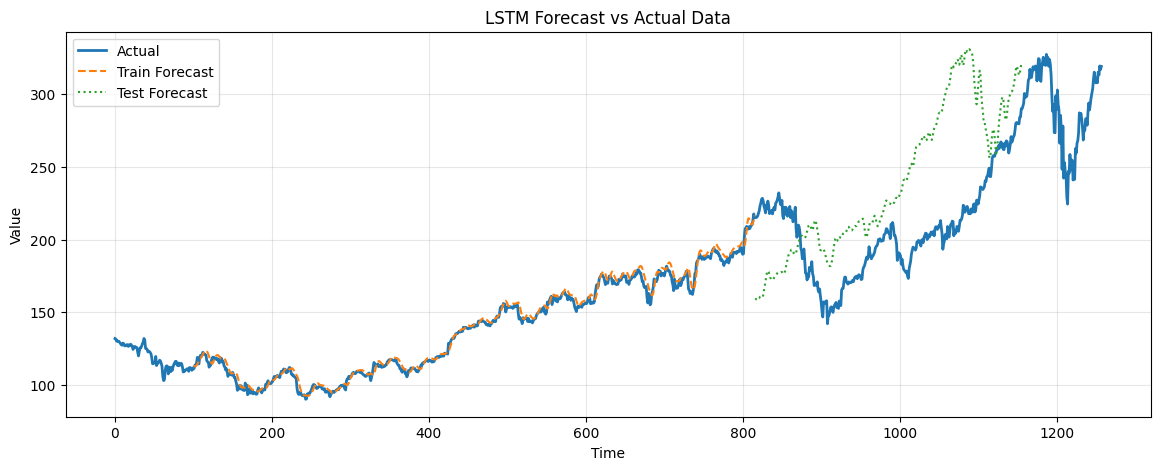

In [ ]:
plt.figure(figsize=(14,5))

actual = scaler.inverse_transform(df1.reshape(-1,1)).flatten()
train_line = np.zeros_like(actual)
test_line = np.zeros_like(actual)

train_line[:] = np.nan
test_line[:] = np.nan

train_line[100:100+len(train_predict)] = train_predict.flatten()
test_line[100+len(train_predict):100+len(train_predict)+len(test_predict)] = test_predict.flatten()

plt.plot(actual, linewidth=2, label="Actual")
plt.plot(train_line, linestyle="--", label="Train Forecast")
plt.plot(test_line, linestyle=":", label="Test Forecast")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("LSTM Forecast vs Actual Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
len(test_data)



441

In [ ]:
# Taking last 100 inputs as we are taking 100 previous time steps from test data and creating x_input which we will use for predicting next 3 days

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
# Printing x_input

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.8232711306256861,
 0.78143206957696

In [ ]:
import numpy as np

future_days = 3
n_steps = 100

temp_input = list(test_data[-100:].reshape(-1))
lst_output = []

for day in range(future_days):
    x_input = np.array(temp_input[-100:]).reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)

    lst_output.append(yhat[0][0])
    temp_input.append(yhat[0][0])

print(lst_output)

[np.float32(0.99296516), np.float32(1.0007901), np.float32(1.0105495)]


In [ ]:
# Making range for ploting

day_new=np.arange(1,101)
day_pred=np.arange(101,104)
import matplotlib.pyplot as plt
len(df1)

1258

In [ ]:
day_pred

array([101, 102, 103])

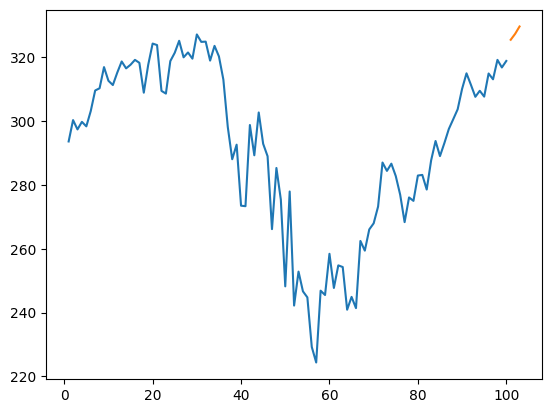

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)))

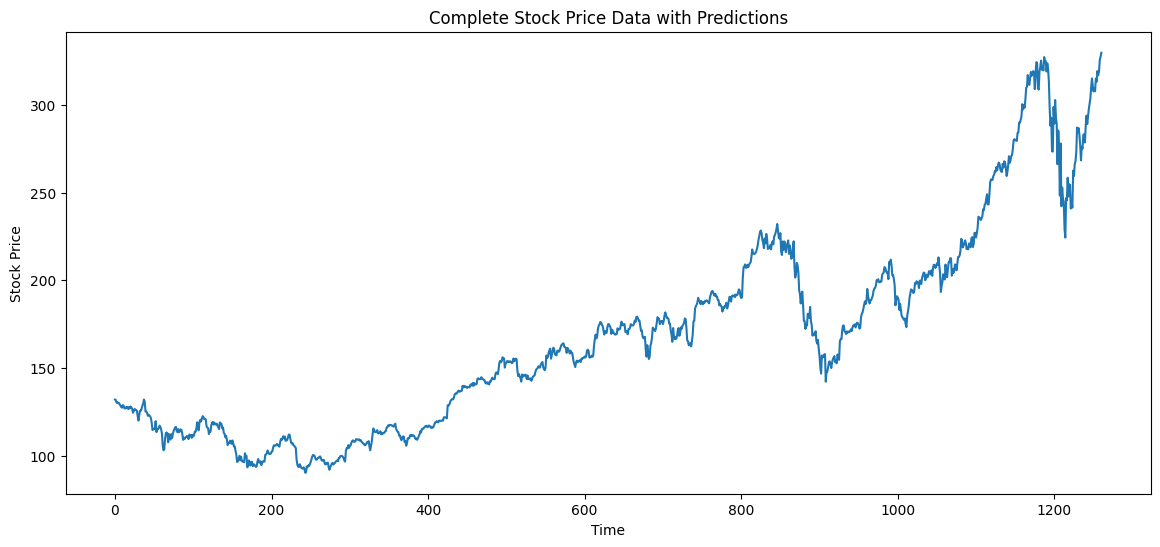

In [ ]:
# Adding data and visualize it as a smooth curve

# Flatten df1 to a 1D list
df3 = df1.flatten().tolist()
# Extend with the predicted output
df3.extend(lst_output)

# Inverse transform the entire combined list for plotting
df3_transformed = scaler.inverse_transform(np.array(df3).reshape(-1, 1))

# Plot the entire dataset including predictions
plt.figure(figsize=(14,6))
plt.plot(df3_transformed)
plt.title('Complete Stock Price Data with Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()